<a href="https://colab.research.google.com/github/zenialexandre/image-processing/blob/main/partial_assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
  Alexandre Zeni

  Replicating the 'Contrast enhancement of microcalcifications
  in mammograms using morphological enhancement and non-flat structuring elements' article.
'''

from google.colab import files

breast_image = files.upload()

Saving breast_image.png to breast_image.png


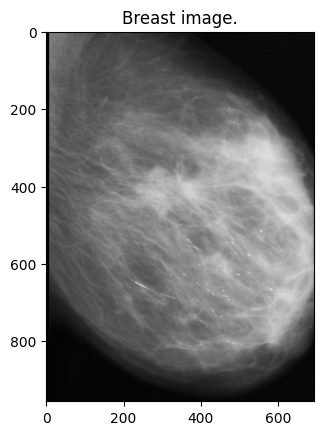

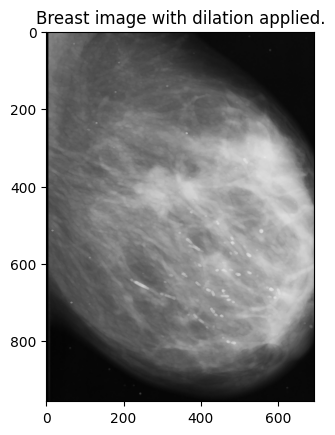

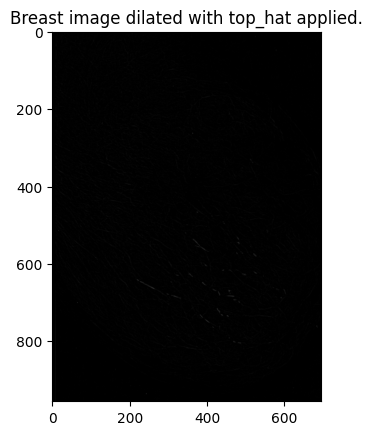

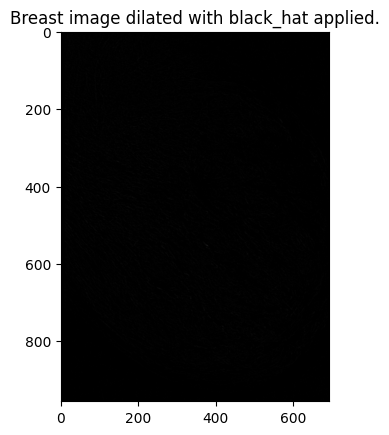

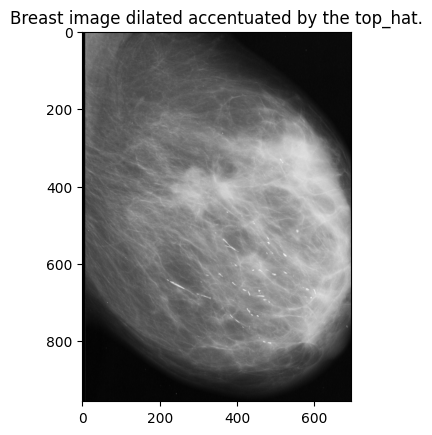

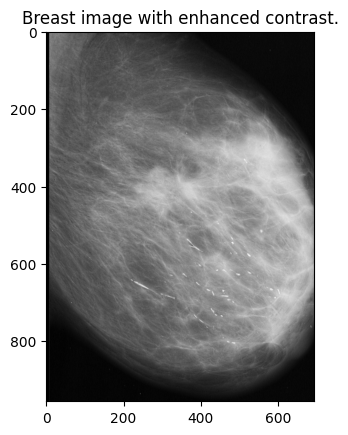

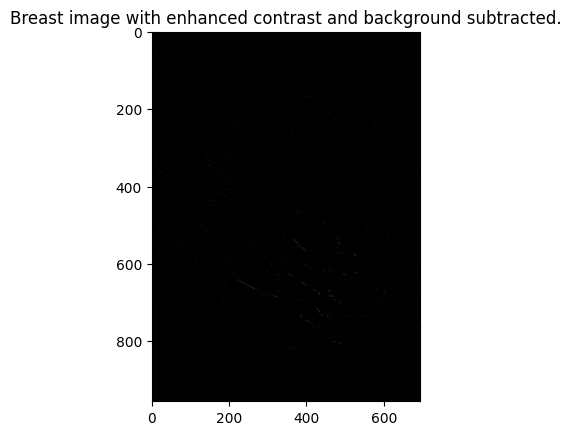

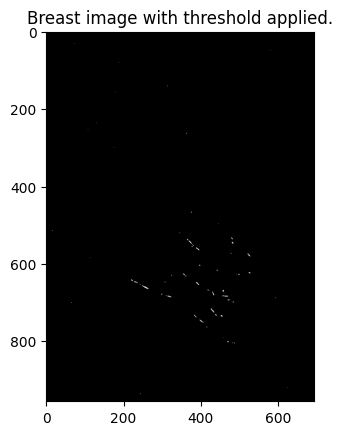

In [81]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
import cv2

breast_image_path: str = 'breast_image.png'

def show_original_breast_image(readed_breast_image) -> None:
  plt.imshow(readed_breast_image)
  plt.title('Breast image.')
  plt.show()

def show_original_image_dilated(readed_breast_image) -> None:
  image_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  dilated_image = cv2.dilate(readed_breast_image, image_kernel, iterations=1)

  plt.imshow(dilated_image)
  plt.title('Breast image with dilation applied.')
  plt.show()

  print('\n')
  show_dilated_image_with_enhanced_contrast(readed_breast_image, image_kernel)

def show_dilated_image_with_enhanced_contrast(dilated_image, image_kernel) -> None:
  image_top_hat = cv2.morphologyEx(dilated_image, cv2.MORPH_TOPHAT, image_kernel)
  plt.imshow(image_top_hat)
  plt.title('Breast image dilated with top_hat applied.')
  plt.show()
  print('\n')

  image_black_hat = cv2.morphologyEx(dilated_image, cv2.MORPH_BLACKHAT, image_kernel)
  plt.imshow(image_black_hat)
  plt.title('Breast image dilated with black_hat applied.')
  plt.show()
  print('\n')

  accentuated_image = cv2.add(dilated_image, image_top_hat)
  plt.imshow(accentuated_image)
  plt.title('Breast image dilated accentuated by the top_hat.')
  plt.show()
  print('\n')

  enhanced_contrast_image = cv2.subtract(accentuated_image, image_black_hat)
  plt.imshow(enhanced_contrast_image)
  plt.title('Breast image with enhanced contrast.')
  plt.show()
  print('\n')

  show_image_with_background_subtracted(dilated_image, enhanced_contrast_image)

def show_image_with_background_subtracted(dilated_image, enhanced_contrast_image) -> None:
  background_subtracted_image = cv2.subtract(enhanced_contrast_image, dilated_image)

  plt.imshow(background_subtracted_image)
  plt.title('Breast image with enhanced contrast and background subtracted.')
  plt.show()
  print('\n')

  show_image_thresholded(background_subtracted_image)

def show_image_thresholded(background_subtracted_image) -> None:
  thresholded_image = cv2.threshold(background_subtracted_image, 25, 255, cv2.THRESH_BINARY)[1]

  plt.imshow(thresholded_image)
  plt.title('Breast image with threshold applied.')
  plt.show()

if (os.path.exists(breast_image_path)):
  readed_breast_image = cv2.imread(breast_image_path, cv2.IMREAD_COLOR)

  show_original_breast_image(readed_breast_image)
  print('\n')
  show_original_image_dilated(readed_breast_image)
